In [41]:
#
# TODO: Import whatever needs to be imported to make this work
#
# .. your code here ..

from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Look Pretty

matplotlib.style.use('ggplot')
plt.style.use('ggplot')

In [42]:
#
# TODO: To procure the dataset, follow these steps:
# 1. Navigate to: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
# 2. In the 'Primary Type' column, click on the 'Menu' button next to the info button,
#    and select 'Filter This Column'. It might take a second for the filter option to
#    show up, since it has to load the entire list first.
# 3. Scroll down to 'GAMBLING'
# 4. Click the light blue 'Export' button next to the 'Filter' button, and select 'Download As CSV'

In [43]:
#
# TODO: Load your dataset after importing Pandas
#
# .. your code here ..

df = pd.read_csv('Datasets/GAMBLING criminal report.csv')
df.shape

(14090, 22)

In [44]:
#
# TODO: Drop any ROWs with nans in them
#
# .. your code here ..
df = df.dropna()
df.shape

(12875, 22)

In [45]:
#
# TODO: Print out the dtypes of your dset
#
# .. your code here ..
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [46]:
#
# Coerce the 'Date' feature (which is currently a string object) into real date,
# and confirm by re-printing the dtypes. NOTE: This is a slow process...
#
# .. your code here ..
df.Date = pd.to_datetime(df.Date, coerce=True)
df.dtypes

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

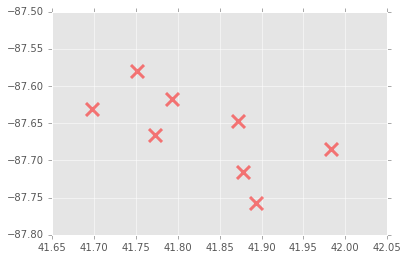

[[ 41.75095773 -87.5801561 ]
 [ 41.89370667 -87.75747678]
 [ 41.77305852 -87.66587835]
 [ 41.69718213 -87.63130514]
 [ 41.87183531 -87.64663979]
 [ 41.98244509 -87.68528101]
 [ 41.87768571 -87.71596564]
 [ 41.79316295 -87.61789681]]


In [47]:
def doKMeans(df):
  #
  # INFO: Plot your data with a '.' marker, with 0.3 alpha at the Longitude,
  # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)
    #plt.show()
    
  #
  # TODO: Filter df so that you're only looking at Longitude and Latitude,
  # since the remaining columns aren't really applicable for this purpose.
    af = df[['Latitude', 'Longitude']]

  #
  # TODO: Use K-Means to try and find seven cluster centers in this df.
  # Be sure to name your kmeans model `model` so that the printing works.
    kmean = KMeans(n_clusters=8)
    model = kmean.fit(af)
    
  #
  # INFO: Print and plot the centroids...
    centroids = model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    
    plt.show()
    print(centroids)
    
# INFO: Print & Plot your data
doKMeans(df)

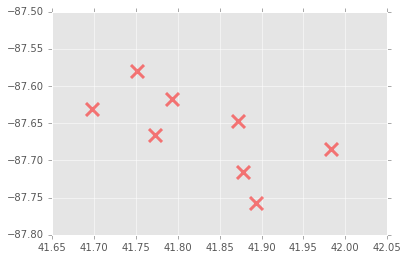

[[ 41.77298026 -87.66581476]
 [ 41.87766551 -87.71596538]
 [ 41.75093778 -87.58021566]
 [ 41.98237147 -87.68532949]
 [ 41.89370667 -87.75747678]
 [ 41.87183531 -87.64663979]
 [ 41.79321345 -87.61786731]
 [ 41.69687153 -87.63123048]]


In [51]:
#
# TODO: Filter out the data so that it only contains samples that have
# a Date > '2011-01-01', using indexing. Then, in a new figure, plot the
# crime incidents, as well as a new K-Means run's centroids.
#
newdf = df[df.Date > '2011-01-01']
doKMeans(df)

In [49]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,2006-02-09 22:29:07,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7.0,43.0,19,1194833.0,1855572.0,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,2006-02-01 12:30:27,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27.0,23.0,19,1150871.0,1903067.0,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,2006-02-02 19:02:12,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1142605.0,1904502.0,2006,04/15/2016 08:55:02 AM,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,2006-02-01 20:13:00,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29.0,25.0,19,1138430.0,1900175.0,2006,04/15/2016 08:55:02 AM,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,2006-02-01 10:10:00,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17.0,67.0,19,1167231.0,1856980.0,2006,04/15/2016 08:55:02 AM,41.763106,-87.662629,"(41.763105901, -87.66262925)"
5,4651151,HM161364,2006-02-03 16:40:00,001XX N LATROBE AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1141360.0,1900477.0,2006,04/15/2016 08:55:02 AM,41.882983,-87.756382,"(41.882982785, -87.756382024)"
6,4656683,HM161437,2006-02-03 16:30:00,002XX W ALEXANDER ST,1651,GAMBLING,GAME/CARDS,OTHER,True,False,...,25.0,34.0,19,1174969.0,1889230.0,2006,04/15/2016 08:55:02 AM,41.851434,-87.633305,"(41.851433926, -87.633305383)"
7,4656759,HM161911,2006-02-03 20:00:00,044XX N MILWAUKEE AVE,1680,GAMBLING,OTHER,ALLEY,True,False,...,45.0,15.0,19,1141580.0,1928940.0,2006,04/15/2016 08:55:02 AM,41.961084,-87.754869,"(41.961084206, -87.754869118)"
8,4657274,HM159750,2006-02-02 19:30:00,084XX S PULASKI RD,1680,GAMBLING,OTHER,OTHER,True,False,...,18.0,70.0,19,1151210.0,1848126.0,2006,04/15/2016 08:55:02 AM,41.739137,-87.721580,"(41.739136801, -87.721580463)"
9,4657315,HM159804,2006-02-02 18:50:00,049XX W FOSTER AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,TAVERN/LIQUOR STORE,True,False,...,45.0,12.0,19,1142277.0,1934118.0,2006,04/15/2016 08:55:02 AM,41.975280,-87.752177,"(41.975280123, -87.752177413)"
